In [0]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
#-----------------------------------------------
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split # splitting dataset

#-----------------------tensorflow--------
import tensorflow as tf

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


     |████████████████████████████████| 993kB 50.3MB/s 


In [0]:
link='https://drive.google.com/open?id=12akMLeDPybIV1sZr2IyUcavLkpbVbIIb';
fluff, id = link.split('=')
print (id)

12akMLeDPybIV1sZr2IyUcavLkpbVbIIb


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv')  
data = pd.read_csv('train.csv')

W0707 12:00:28.272218 139921547216768 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

In [0]:
data.head(420)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data.shape

(42000, 785)

In [0]:
labels_flat=data.iloc[:,0].values #0th column labels
labels_flat[0:10] # 1st 10th labels

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3])

In [0]:
images=data.iloc[:,1:].values
images=images.astype(np.float32)

In [0]:
img_width=img_height=28

In [0]:
#display image
def display(image):
  some_image=images[image].reshape(img_width, img_height)
  plt.axis("off")
  plt.imshow(some_image,cmap="gray")
  plt.title(labels_flat[image])
  plt.show()

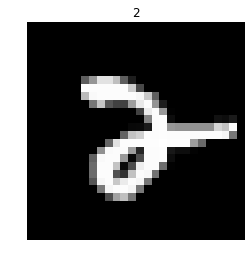

In [0]:
display(34)

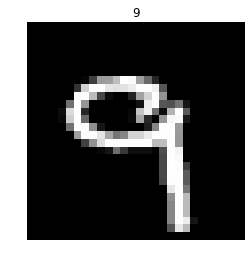

In [0]:
display(269)

#ONE  HOT ENCODING 
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**example :**<br>
[1,0,0,0,0,0,0] label=0 <br>
[0,1,0,0,0,0,0] label=1 <br>
[0,0,1,0,0,0,0] label=2 <br>
[0,0,0,1,0,0,0] label=3 <br>
[0,0,0,0,1,0,0] label=4 <br>
[0,0,0,0,0,1,0] label=5 <br>
[0,0,0,0,0,0,1] label=6 <br>



In [0]:
one_hot_encoder=OneHotEncoder(sparse=False) 
encoded=labels_flat.reshape(len(labels_flat),1)#creates an array of 42000individual x 1
labels=one_hot_encoder.fit_transform(encoded) # categorial data into encode vector
labels=labels.astype(np.uint8) #

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
print(labels_flat[1])
print(labels[1])

0
[1 0 0 0 0 0 0 0 0 0]


In [0]:
print(labels_flat[99])
print(labels[99])

5
[0 0 0 0 0 1 0 0 0 0]


**here, train_test_split() splits the image into xtrain, xval, ytrain, yval <br>( 80% training data and 20% validation data )**<br>
where,
xtrain : training image data <br> 
ytrain : training labels data <br>
xval: validation  image data<br>
yval:  validation label data<br>

**x are the images and y are the labels**


In [0]:
xtrain,xval,ytrain,yval=train_test_split(images, labels, test_size=0.2, random_state=0)

In [0]:
print('xtrain : ',xtrain.shape)
print('xval : ',xval.shape)
print('ytrain : ',ytrain.shape)
print('yval : ',yval.shape)

xtrain :  (33600, 784)
xval :  (8400, 784)
ytrain :  (33600, 10)
yval :  (8400, 10)


# Neutral Network  
input : 784 neurons (image sare made up of 784 pixels)<br>
hidden layer : 2 layes (IP,120, 32,OP)<br>
output : 10 neurons<br>



In [0]:
X=tf.placeholder(tf.float32,[None,784],name='Input') # placeholders<dattype,shape,name>
Y=tf.placeholder(tf.float32,[None,10],name='Output') # None because don't know the no of images


#Creating Hidden layers

**hidden layer : 1**

**truncated_normal :**<br> it keeps the weight in particular range. <br>
standard deviation (stddev=0.001) : it means that weight value will be between -0.001 to 0.001(range : (0.001to 0))<br>
[784,120] : inputs are coming from 784 neurons
and hidden layer size is 120 neurons<br>
<br>
**hidden layer biases**  
tf.zeros([120]) means we are giving them 0 value.
<br>
<br>
**output of hidden layer : hidden_1**<br>
output is matix multiplication of X(input) and weight + biases
<br><br>
**Activation function (relu())**<br>
activation function is used to determine output of a neural network
<br>
**(matmul(input_i,weight_i)+baises_i) * activation**
<br>
activation  function(relu function) returns two value : <br>
1: false :0 if  mutmul result is invalid(eg: -ve value)<br>
2: false :1 if  mutmul result is valid(eg: +ve value). <br>

In [0]:
weights_1=tf.Variable(tf.truncated_normal([784, 120],stddev=0.001),name='weights_1')
biases_1=tf.Variable(tf.zeros([120]),name='biases_1')
hidden1=tf.nn.relu(tf.matmul(X,weights_1)+biases_1)

**hidden layer : 2**

input : 120 and output : 32

In [0]:
weights_2=tf.Variable(tf.truncated_normal([120, 32],stddev=0.001),name='weights_2')
biases_2=tf.Variable(tf.zeros([32]),name='biases_2')
hidden2=tf.nn.relu(tf.matmul(hidden1,weights_2)+biases_2)

**output layer :**

In [0]:
weights_3=tf.Variable(tf.zeros([32, 10]),name='weights_3')
biases_3=tf.Variable(tf.zeros([10]),name='biases_3')
Ylogits=tf.matmul(hidden2,weights_3)+biases_3
output=tf.nn.softmax(Ylogits) # for output : softmax activation function

# Optimisation methods to improve the output of MNIST DIGIT RECOGNITION MODEL<br>

In [0]:
#cross_entropy difference bw actual and predicted value
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits,labels=Y))
optimizer=tf.train.GradientDescentOptimizer(0.005) #gradient descent optimizer learning rate alpha=0.005
train_step=optimizer.minimize(cross_entropy) # GD optimizer help us to minimize loss

# correct pred is used to find which predictions are correct and which predictions are wrong
correct_prediction=tf.equal(tf.argmax(output,1),tf.argmax(Y,1))
#argmax() it pick up the index of maximum value in array
#output is an array of probability and it picks the index of highest prob
# equal fuction compares the value of both the arrays

accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
# calculates accuracy
# cast convert it to float datatype
# reduce_min to get the mean or avg value

#PASSING VALUE TO NEURAL NETWORK USING SESSION

In [0]:
with tf.Session() as sess:
  init=tf.global_variables_initializer()
  sess.run(init)
  
  batch_size=200 # no of images pass to the neural network {none-->batch_size}
  epoch=100 # how many times training data pass through the neural network
  iterations=int(xtrain.shape[0]/batch_size) 
  
  for ep in range(epoch):
    for i in range(iterations):
      batch_start=(i*batch_size)%(xtrain.shape[0]-batch_size)
      batch_end=batch_start + batch_size
      batch_X=xtrain[batch_start:batch_end]
      batch_Y=ytrain[batch_start:batch_end]
      train_data={X:batch_X,Y:batch_Y}
      
      sess.run(train_step, feed_dict=train_data)
    ans=sess.run(accuracy,feed_dict={X:xval,Y:yval})
    print("EPOCH NUMBER "+str(ep+1)+" |","Accurracy : {} %".format(ans*100))


EPOCH NUMBER 1 | Accurracy : 11.440476030111313 %
EPOCH NUMBER 2 | Accurracy : 18.77380907535553 %
EPOCH NUMBER 3 | Accurracy : 29.404762387275696 %
EPOCH NUMBER 4 | Accurracy : 69.67856884002686 %
EPOCH NUMBER 5 | Accurracy : 87.53571510314941 %
EPOCH NUMBER 6 | Accurracy : 90.6428575515747 %
EPOCH NUMBER 7 | Accurracy : 92.72618889808655 %
EPOCH NUMBER 8 | Accurracy : 93.99999976158142 %
EPOCH NUMBER 9 | Accurracy : 94.74999904632568 %
EPOCH NUMBER 10 | Accurracy : 95.45238018035889 %
EPOCH NUMBER 11 | Accurracy : 95.67857384681702 %
EPOCH NUMBER 12 | Accurracy : 95.80952525138855 %
EPOCH NUMBER 13 | Accurracy : 95.96428275108337 %
EPOCH NUMBER 14 | Accurracy : 96.0357129573822 %
EPOCH NUMBER 15 | Accurracy : 96.1904764175415 %
EPOCH NUMBER 16 | Accurracy : 96.35714292526245 %
EPOCH NUMBER 17 | Accurracy : 96.44047617912292 %
EPOCH NUMBER 18 | Accurracy : 96.5238094329834 %
EPOCH NUMBER 19 | Accurracy : 96.48809432983398 %
EPOCH NUMBER 20 | Accurracy : 96.45237922668457 %
EPOCH NUMBE